### "DATASET: The DataSet contains information about Youku Tudou. Youku Tudou contains less self-produced content and more professionally created ones. They are subtitled in Mandarin.People can react on the Posts.


ATTRIBUTE INFORMATION:

1.	status_id : The Post Identification number
2.	status_type : The type of the Post
3.	num_reactions : Total Number of reaction on the particular post
4.	num_comments : Total Comments on the particular post
5.	num_shares: Total Number of Shares on the particular post
6.	num_likes : Total Number of Likes on the particular post
7.	num_loves : Total Number of Loves on the particular post
8.	num_wows : Total Number of wow reactions on the particular post
9.	num_hahas : Total Number of haha reactions on the particular post
10.	num_sads : Total Number of sad reactions on the particular post
11.	num_angrys : Total Number of angry reactions on the particular post


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data_set.csv')
df.head()

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1502675606516230,photo,2435,2756,591,2620,2054,2589,2786,1043,355
1,246675545449582_1497272363723221,link,2832,2404,492,1099,1787,2293,1946,1211,388
2,246675545449582_1495724170544707,photo,1795,1474,751,2031,2615,2902,2100,1180,382
3,246675545449582_1492286100888514,photo,1974,1102,706,1467,1791,1725,2545,1091,364
4,246675545449582_1491577434292714,photo,1926,1686,719,1743,1701,2930,1580,1284,403


In [3]:
df.shape
#There are 1256 rows and 11 columns

(1256, 11)

In [4]:
df.dtypes
#There are two object and 9 integer dtype variables in our dataset

status_id        object
status_type      object
num_reactions     int64
num_comments      int64
num_shares        int64
num_likes         int64
num_loves         int64
num_wows          int64
num_hahas         int64
num_sads          int64
num_angrys        int64
dtype: object

In [5]:
#since status_id only contains unique values which do not add any value to our data,

# we shall drop the column

df = df.drop('status_id',axis = 1)



In [6]:
df_num = df.select_dtypes(np.number)
df_num.columns
#Numerical features

Index(['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves',
       'num_wows', 'num_hahas', 'num_sads', 'num_angrys'],
      dtype='object')

In [7]:
df_cat = df.select_dtypes('O')
df_cat.columns
#Categorical feature

Index(['status_type'], dtype='object')

In [8]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000
mean,2095.538217,1940.698248,676.113854,2025.598726,2086.928344,2055.230096,2036.652070,1192.673567,384.536624
std,513.125650,588.804174,128.279267,552.038960,572.046813,653.607336,530.425486,106.090370,21.224850
min,906.000000,858.000000,406.000000,813.000000,773.000000,861.000000,881.000000,957.000000,337.000000
25%,1736.000000,1426.750000,574.000000,1563.750000,1692.750000,1459.500000,1608.000000,1131.000000,372.000000
50%,2147.500000,1836.000000,663.000000,2030.500000,2056.000000,2090.000000,2104.000000,1179.000000,382.000000
75%,2502.250000,2437.500000,766.000000,2500.250000,2533.250000,2681.250000,2343.500000,1278.000000,402.000000
max,3176.000000,3173.000000,973.000000,3111.000000,3256.000000,3160.000000,3214.000000,1424.000000,431.000000


In [9]:
df_cat.columns
#status_type is the only categorical column in the dataset 


Index(['status_type'], dtype='object')

In [10]:
df_cat.describe()

#There are 4 unique type of Status type with the top value being photo



,status_type
count,1256
unique,4
top,photo
freq,667


In [11]:
df['status_type'].value_counts()/len(df)*100


photo     53.105096
video     37.898089
status     7.404459
link       1.592357
Name: status_type, dtype: float64

In [12]:
df.cov()
#Covariance table

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
num_reactions,263297.933200,31367.494011,-65823.197582,72911.596224,-37466.121562,23470.277654,-2638.833306,529.918461,108.636846
num_comments,31367.494011,346690.355885,-7844.486733,-25443.890903,-33137.283791,-7056.726529,21127.500506,-4232.956748,-851.834757
num_shares,-65823.197582,-7844.486733,16455.570294,-18226.151090,9364.862348,-5858.468449,654.185461,-131.373163,-26.932062
num_likes,72911.596224,-25443.890903,-18226.151090,304747.013353,-11764.726785,-114237.434288,-10299.436938,2058.879265,415.117497
num_loves,-37466.121562,-33137.283791,9364.862348,-11764.726785,327237.556614,55146.563911,-3802.197860,758.270614,158.700634
num_wows,23470.277654,-7056.726529,-5858.468449,-114237.434288,55146.563911,427202.550201,-44495.881632,8897.299872,1782.113877
num_hahas,-2638.833306,21127.500506,654.185461,-10299.436938,-3802.197860,-44495.881632,281351.195980,-56272.833985,-11257.199598
num_sads,529.918461,-4232.956748,-131.373163,2058.879265,758.270614,8897.299872,-56272.833985,11255.166663,2251.554594
num_angrys,108.636846,-851.834757,-26.932062,415.117497,158.700634,1782.113877,-11257.199598,2251.554594,450.494275


In [13]:
df.corr()
#Correlation table

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
num_reactions,1.000000,0.103821,-0.999997,0.257397,-0.127639,0.069981,-0.009695,0.009734,0.009975
num_comments,0.103821,1.000000,-0.103857,-0.078279,-0.098382,-0.018336,0.067648,-0.067764,-0.068162
num_shares,-0.999997,-0.103857,1.000000,-0.257376,0.127618,-0.069873,0.009614,-0.009653,-0.009892
num_likes,0.257397,-0.078279,-0.257376,1.000000,-0.037255,-0.316608,-0.035174,0.035155,0.035429
num_loves,-0.127639,-0.098382,0.127618,-0.037255,1.000000,0.147493,-0.012531,0.012494,0.013071
num_wows,0.069981,-0.018336,-0.069873,-0.316608,0.147493,1.000000,-0.128345,0.128311,0.128462
num_hahas,-0.009695,0.067648,0.009614,-0.035174,-0.012531,-0.128345,1.000000,-0.999996,-0.999911
num_sads,0.009734,-0.067764,-0.009653,0.035155,0.012494,0.128311,-0.999996,1.000000,0.999912
num_angrys,0.009975,-0.068162,-0.009892,0.035429,0.013071,0.128462,-0.999911,0.999912,1.000000


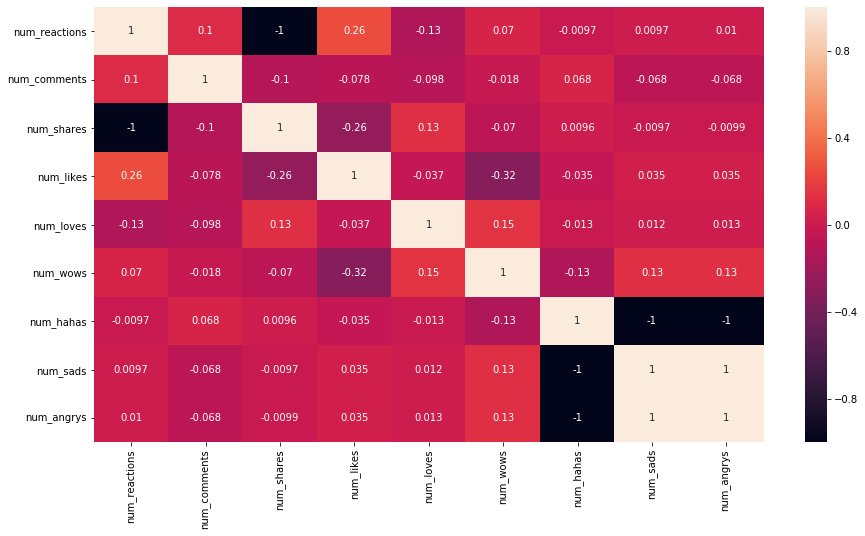

In [14]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(),annot = True)

In [15]:
# We can notice that there is moderate multicollinearity among the independent variables

# num_likes and num_reactions are correlated with each other

# num_likes and num reactions also have positive correlation

# num_wows have slight positive collinearity with num_sads and num_angrys



In [16]:

# If we are taking decision based on the relationship between variables, PCA is the better choice

#PCA should be used when the data has moderate/strong multicollinearity among the independent variables

#It is evident from the heatmap that there is moderate multicollinearity present


#PCA combines the the similiar correlated attributes and creates new ones which are superior to the orginal attributes



In [17]:


#we shall check for defects in the data first,


df.isnull().sum()
#No null values



status_type      0
num_reactions    0
num_comments     0
num_shares       0
num_likes        0
num_loves        0
num_wows         0
num_hahas        0
num_sads         0
num_angrys       0
dtype: int64

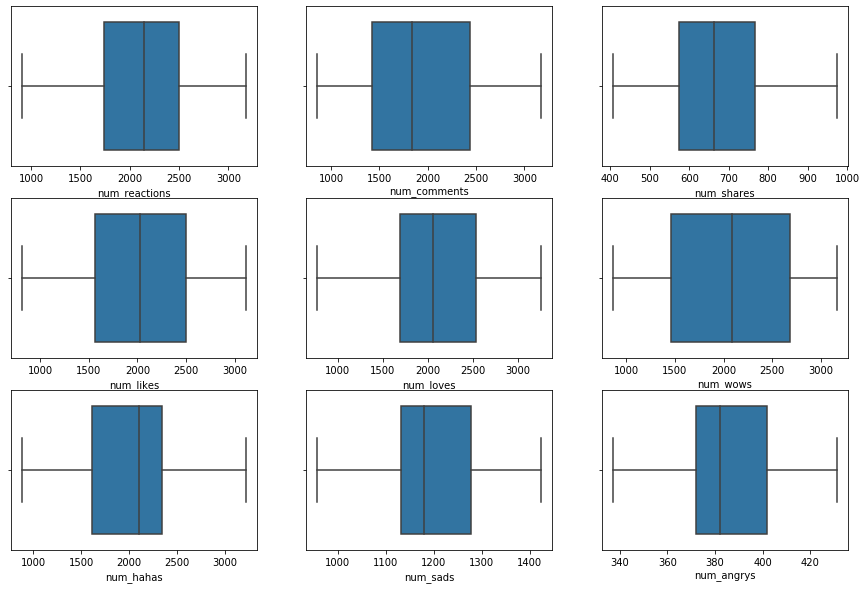

In [18]:
#Outlier check
df_num = df.select_dtypes(np.number)
fig,ax = plt.subplots(nrows =3,ncols = 3,figsize = (15,10))

for i,j in zip(df_num.columns,ax.flatten()):
    sns.boxplot(df_num[i],ax = j)
    
plt.show()

In [19]:
#There are no outliers in our data

In [20]:

# For applying PCA,KMeans,

# It is ideal to have a scaled data.

# We are using Standard scaler to reduce the mean to zero and variance to 1


from sklearn.preprocessing import StandardScaler

ss = StandardScaler().fit_transform(df_num.values)

df_num = pd.DataFrame(ss,index = df_num.index,columns = df_num.columns)

df_num.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,1.256000e+03,1.256000e+03,1.256000e+03,1.256000e+03,1.256000e+03,1.256000e+03,1.256000e+03,1.256000e+03,1.256000e+03
mean,-2.338893e-16,-1.815604e-16,-2.121445e-18,-4.362515e-17,7.314567e-18,1.584012e-16,-2.634128e-17,2.386626e-16,5.013682e-16
std,1.000398e+00,1.000398e+00,1.000398e+00,1.000398e+00,1.000398e+00,1.000398e+00,1.000398e+00,1.000398e+00,1.000398e+00
min,-2.319144e+00,-1.839541e+00,-2.106509e+00,-2.197457e+00,-2.297804e+00,-1.827865e+00,-2.179594e+00,-2.222327e+00,-2.240560e+00
25%,-7.009617e-01,-8.732156e-01,-7.963448e-01,-8.369567e-01,-6.893411e-01,-9.118126e-01,-8.084506e-01,-5.815620e-01,-5.908931e-01
50%,1.013056e-01,-1.778859e-01,-1.022697e-01,8.882029e-03,-5.408764e-02,5.321812e-02,1.270202e-01,-1.289374e-01,-1.195596e-01
75%,7.929321e-01,8.440831e-01,7.009858e-01,8.601573e-01,7.805295e-01,9.581736e-01,5.787244e-01,8.046010e-01,8.231074e-01
max,2.106486e+00,2.093723e+00,2.315295e+00,1.966951e+00,2.044478e+00,1.690939e+00,2.220513e+00,2.181334e+00,2.189975e+00


In [21]:
#clean df 

df = pd.concat([df_num,df_cat],axis = 1)
df.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type
0,0.661820,1.385225,-0.663769,1.077167,-0.057585,0.816978,1.413293,-1.411374,-1.392160,photo
1,1.435818,0.787165,-1.435830,-1.679171,-0.524516,0.363926,-0.170973,0.172812,0.163241,link
2,-0.585934,-0.792936,0.584007,0.009788,0.923494,1.296049,0.119476,-0.119508,-0.119560,photo
3,-0.236953,-1.424977,0.233070,-1.012286,-0.517521,-0.505444,0.958759,-0.958749,-0.967960,photo
4,-0.330535,-0.432741,0.334452,-0.512122,-0.674913,1.338905,-0.861259,0.861179,0.870241,photo


In [22]:
#2b

#Generating covariance matrix

df = pd.get_dummies(df,drop_first= True)

cov_mat = np.cov(df.T)

cov_mat

array([[ 1.00079681e+00,  1.03903728e-01, -1.00079401e+00,
         2.57601902e-01, -1.27740719e-01,  7.00363489e-02,
        -9.70308336e-03,  9.74216034e-03,  9.98285355e-03,
         3.78895116e-03,  2.24780062e-03,  2.45152906e-04],
       [ 1.03903728e-01,  1.00079681e+00, -1.03940092e-01,
        -7.83409491e-02, -9.84601220e-02, -1.83510704e-02,
         6.77015748e-02, -6.78176753e-02, -6.82159217e-02,
        -2.20897867e-02, -8.87685995e-03,  2.81344246e-02],
       [-1.00079401e+00, -1.03940092e-01,  1.00079681e+00,
        -2.57581508e-01,  1.27720107e-01, -6.99288879e-02,
         9.62201323e-03, -9.66095673e-03, -9.89952610e-03,
        -3.79639617e-03, -2.26556006e-03, -2.18697940e-04],
       [ 2.57601902e-01, -7.83409491e-02, -2.57581508e-01,
         1.00079681e+00, -3.72843400e-02, -3.16860211e-01,
        -3.52018335e-02,  3.51828567e-02,  3.54570488e-02,
         1.04119937e-02, -1.35440203e-02,  3.35011264e-04],
       [-1.27740719e-01, -9.84601220e-02,  1.2772010

In [23]:
eigenvalues,eigenvectors = np.linalg.eig(cov_mat)


In [24]:
print(eigenvalues)

[3.03594626e+00 2.16440893e+00 1.30415597e+00 1.09029599e+00
 8.66104326e-01 5.52226736e-01 4.38728844e-01 1.03481430e-01
 5.09307574e-03 1.16201132e-04 2.77426627e-06 3.57147261e-06]


In [25]:
print(eigenvectors)

[[ 2.04616071e-02  6.59411816e-01 -1.59495564e-01  7.93717265e-02
  -2.22221778e-02 -1.79474423e-01 -1.69626872e-02  2.77643548e-03
  -2.14160260e-03 -7.59160669e-03 -7.04749360e-01  5.73102062e-02]
 [-5.78008983e-02  1.14535047e-01 -1.63517752e-01 -6.98755812e-01
   6.59964084e-01  1.73487659e-01 -5.14993285e-02 -1.51908444e-02
   3.06562095e-03 -3.61836108e-04 -1.10723154e-05  8.89272316e-05]
 [-2.04106946e-02 -6.59412064e-01  1.59460723e-01 -7.93527525e-02
   2.21700161e-02  1.79596778e-01  1.70466349e-02 -2.55152969e-03
   2.16789106e-03 -7.84758550e-03 -7.04723581e-01  5.73526990e-02]
 [ 1.99723161e-02  2.96316514e-01  5.75867338e-01  2.80426324e-01
   2.20519958e-01  6.67614418e-01  8.32037175e-02 -1.63107913e-02
   2.91943832e-03  1.59315364e-04  4.37538060e-05  3.79636619e-05]
 [ 1.84668236e-02 -1.67940036e-01 -2.32961004e-01  6.27988039e-01
   6.90072727e-01 -2.11480207e-01 -4.32921866e-02 -3.17438961e-03
   2.56434051e-03  4.47880470e-04 -3.45712742e-05  2.90023393e-05]
 [ 1.

In [26]:
ev_list = eigenvalues.tolist()
ev_list.sort(reverse = True)
ev_list[:5]

#These are the top 5 Eigen values in the matrix

[3.0359462609576955,
 2.1644089331728438,
 1.304155974307713,
 1.0902959853442613,
 0.8661043263630677]

In [27]:
evec_list = eigenvectors.tolist()
evec_list.sort(reverse = True)
evec_list[:5]

#These are the top 5 Eigen Vectors in the matrix

[[0.5725045968704322,
  -0.011607277219445333,
  0.04005919350901708,
  -0.04337482063466908,
  0.0240405663582656,
  -0.03492237066038206,
  -0.009805466300939371,
  -0.0032079084574474634,
  0.002245439795495091,
  -0.8164567270836449,
  0.008474588109712713,
  -0.005936087518815666],
 [0.5724989096608188,
  -0.011723661174254222,
  0.04013448581501304,
  -0.044086376074668226,
  0.02385265947922212,
  -0.03491561475092671,
  -0.0100061678335348,
  -0.004704058210706292,
  0.001070904040093659,
  0.40366152297067553,
  0.05316664123291486,
  0.7077233950643583],
 [0.10852248935522064,
  -0.028360059850868737,
  -0.7289549804974969,
  0.13485665238130498,
  -0.1794269259271169,
  0.6271699813013599,
  0.11064565852949156,
  0.008709105295554145,
  -0.0015360968491245394,
  9.377388856888309e-05,
  9.461689452367513e-05,
  3.5024245930149836e-05],
 [0.020461607147544882,
  0.6594118160270741,
  -0.15949556390126857,
  0.07937172645503483,
  -0.02222217781567324,
  -0.17947442291282265,

In [28]:
percent_var = []

for i in ev_list[:5]:
    variation = (i/sum(eigenvalues))*100
    percent_var.append(variation)
    
np.cumsum(percent_var)

#88% variation is explained by top 5 principal components in the data

array([31.75488627, 54.39381121, 68.03480518, 79.43890197, 88.4980361 ])

In [29]:
from sklearn.decomposition import PCA

percent_var = []

for i in eigenvalues:
    variation = (i/sum(eigenvalues))*100
    percent_var.append(variation)
    
np.cumsum(percent_var)

# We can see that 95% varitation is achieved in the 7th component



array([ 31.75488627,  54.39381121,  68.03480518,  79.43890197,
        88.4980361 ,  94.27412556,  98.86306862,  99.9454465 ,
        99.9987182 ,  99.99993363,  99.99996264, 100.        ])

In [30]:
pca = PCA(n_components = 7)

df_pca = pca.fit_transform(df)


In [31]:
df.shape

(1256, 12)

In [32]:
df_pca.shape


(1256, 7)

In [33]:
df_pca = pd.DataFrame(df_pca,columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])

df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,2.358789,-1.388460,-0.573885,-0.274291,0.796475,-1.474415,-0.464424
1,-0.299285,-1.555928,-1.678286,-1.099314,-0.324801,1.196156,-0.053616
2,0.026230,1.046337,-0.857452,1.261797,-0.137543,-0.790378,-0.426526
3,1.664586,0.637415,0.093270,0.435326,-1.527290,0.864244,-0.602692
4,-1.617556,0.594040,-0.837954,-0.223629,-1.066139,-0.675749,-0.452542


In [55]:
from sklearn.cluster import KMeans

wcv = []

for i in range(1,8):
    km = KMeans(n_clusters = i)
    km.fit(df_pca)
    wcv.append(km.inertia_)
    


In [56]:
wcv

[14682.777873546,
 11037.041131409575,
 9056.824891454722,
 7340.082266696185,
 6381.265878852131,
 5849.529079347457,
 5445.9802990598]

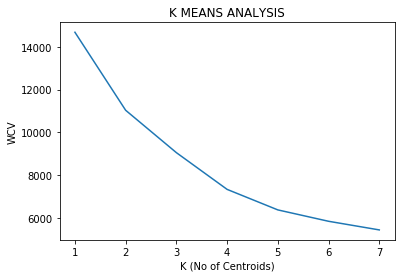

In [57]:
#Elbow plot

plt.plot(range(1,8),wcv)
plt.xlabel('K (No of Centroids)')
plt.ylabel('WCV')
plt.title('K MEANS ANALYSIS')
plt.show()


# We can see that 5 is the right K value

In [38]:
#To cross check lets use silhoutte coefficient

from sklearn.metrics import silhouette_score

sil = []

for i in range(2,8):
    km = KMeans(n_clusters = i)
    km.fit(df_pca)
    sil.append(silhouette_score(df_pca,km.labels_))



In [39]:
sil


[0.2076607085306276,
 0.20798746594408532,
 0.2017067089232018,
 0.21605599494496933,
 0.22080442786940832,
 0.22280260740996535]

In [40]:
# It is evident from the elbow plot and silhoutte coeffiecent score that 5 is the optimal number of clusters

In [41]:
km_best = KMeans(n_clusters = 5,random_state = 1)
km_best.fit(df_pca)

ylabels = km_best.labels_

ylabel_series = pd.Series(ylabels).value_counts()
ylabel_series

0    355
1    269
4    249
3    199
2    184
dtype: int64

Text(0, 0.5, 'Count')

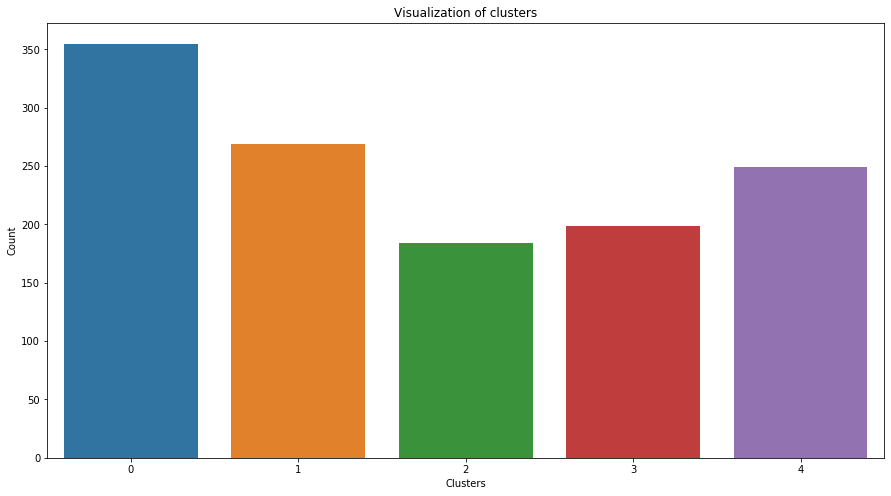

In [79]:
#Visualize
plt.figure(figsize = (15,8))
sns.countplot(ylabels)
plt.title('Visualization of clusters')
plt.xlabel('Clusters')
plt.ylabel('Count')


In [43]:
#We can see that the first cluster has the most number of values and third cluster has the least


In [80]:
df_pca['clusters'] = km_best.labels_

In [81]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,clusters
0,2.358789,-1.388460,-0.573885,-0.274291,0.796475,-1.474415,-0.464424,0
1,-0.299285,-1.555928,-1.678286,-1.099314,-0.324801,1.196156,-0.053616,0
2,0.026230,1.046337,-0.857452,1.261797,-0.137543,-0.790378,-0.426526,1
3,1.664586,0.637415,0.093270,0.435326,-1.527290,0.864244,-0.602692,2
4,-1.617556,0.594040,-0.837954,-0.223629,-1.066139,-0.675749,-0.452542,1


In [46]:
from sklearn.model_selection import train_test_split


x = df_pca.drop('clusters',axis = 1)
y = df_pca['clusters']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)


In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dtc = DecisionTreeClassifier(random_state = 1)

model_pca = dtc.fit(x_train,y_train)

In [48]:
print('The accuracy score of PCA model built is',model_pca.score(x_test,y_test))

The accuracy score of PCA model built is 0.9522546419098143


In [49]:
#We received a 95% accuracy in the model built using PCA with optimal clusters

In [ ]:
# We have used a common classifier algorithm to test the model => Decision Tree classifier

# Decision tree classifier works best for decision based problem statements

# We can see a 95% accuracy in the model built using PCA with optimal number of clusters

# The accuracy was calculated using accuracy_score from sklearn.metrics library

In [50]:
df['clusters'] = km_best.labels_

df.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_photo,status_type_status,status_type_video,clusters
0,0.661820,1.385225,-0.663769,1.077167,-0.057585,0.816978,1.413293,-1.411374,-1.392160,1,0,0,0
1,1.435818,0.787165,-1.435830,-1.679171,-0.524516,0.363926,-0.170973,0.172812,0.163241,0,0,0,0
2,-0.585934,-0.792936,0.584007,0.009788,0.923494,1.296049,0.119476,-0.119508,-0.119560,1,0,0,1
3,-0.236953,-1.424977,0.233070,-1.012286,-0.517521,-0.505444,0.958759,-0.958749,-0.967960,1,0,0,2
4,-0.330535,-0.432741,0.334452,-0.512122,-0.674913,1.338905,-0.861259,0.861179,0.870241,1,0,0,1


In [51]:
# Clusters centroids


km_best.cluster_centers_

array([[ 1.06134983, -0.91273563, -0.77646589, -0.03423042, -0.13678598,
         0.13142356, -0.03120979],
       [-1.51606815,  1.50119413, -0.3325739 ,  0.2119073 , -0.27569225,
        -0.18929957,  0.0104844 ],
       [ 2.33206576,  1.57848198,  0.75278858,  0.08774333, -0.19893374,
        -0.06377303, -0.01370413],
       [-1.74366429, -1.141075  , -0.18603387,  0.80432422,  0.34883711,
        -0.38048923,  0.0728155 ],
       [-0.20509143, -0.57496719,  1.05869644, -0.88777733,  0.36106612,
         0.36834464, -0.01489781]])

In [52]:
df[df['clusters']==0].describe()



,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_photo,status_type_status,status_type_video,clusters
count,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.0
mean,0.728404,0.205263,-0.728530,-0.328024,-0.078758,0.359015,0.646369,-0.646348,-0.646258,0.549296,0.087324,0.352113,0.0
std,0.540828,0.933036,0.540878,0.855649,0.857059,0.687498,0.530641,0.530616,0.530771,0.498266,0.282708,0.478303,0.0
min,-0.691214,-1.817454,-2.106509,-1.793339,-1.867598,-1.096247,-0.233212,-2.043163,-2.052027,0.000000,0.000000,0.000000,0.0
25%,0.382050,-0.324852,-1.065396,-1.138233,-0.587473,-0.244480,0.305250,-0.727722,-0.732293,0.000000,0.000000,0.000000,0.0
50%,0.720309,0.537407,-0.718359,-0.347213,-0.192243,0.504739,0.523086,-0.524984,-0.543760,1.000000,0.000000,0.000000,0.0
75%,1.067341,0.865321,-0.383019,0.198256,0.315785,0.901159,0.729607,-0.308101,-0.308093,1.000000,0.000000,1.000000,0.0
max,2.106486,1.621391,0.693187,1.796605,1.803143,1.521044,2.046999,0.229390,0.210374,1.000000,1.000000,1.000000,0.0


In [96]:
df[df['clusters']==1].describe()



,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_photo,status_type_status,status_type_video,clusters
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.0
mean,-0.917079,-0.502913,0.917143,-0.480196,0.259924,0.647464,-0.849347,0.849401,0.849916,0.557621,0.074349,0.345725,1.0
std,0.616756,0.937605,0.616814,0.779827,0.669842,0.769800,0.679867,0.679629,0.680449,0.497595,0.262828,0.476491,0.0
min,-2.131980,-1.591482,-0.406415,-1.755283,-0.996694,-0.898803,-2.138102,-0.411828,-0.402360,0.000000,0.000000,0.000000,1.0
25%,-1.424269,-1.066481,0.412438,-1.177195,-0.195741,-0.145757,-1.489307,0.276539,0.257507,0.000000,0.000000,0.000000,1.0
50%,-0.942714,-0.753858,0.942742,-0.595483,0.056087,0.997586,-0.861259,0.861179,0.870241,1.000000,0.000000,0.000000,1.0
75%,-0.412418,-0.456527,1.426255,0.316048,0.743367,1.296049,-0.272818,1.492968,1.482974,1.000000,0.000000,1.000000,1.0
max,0.406421,2.051247,2.135928,0.948501,1.971029,1.687878,0.415583,2.134186,2.142841,1.000000,1.000000,1.000000,1.0


In [95]:
df[df['clusters']==2].describe()


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_photo,status_type_status,status_type_video,clusters
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.0
mean,-1.208455,-0.350218,1.208276,-0.058947,-0.048480,-0.670888,1.297271,-1.297347,-1.297125,0.559783,0.065217,0.358696,2.0
std,0.628644,0.893782,0.628703,1.232108,1.002176,0.812090,0.501532,0.501700,0.500937,0.497768,0.247583,0.480926,0.0
min,-2.319144,-1.839541,-0.429811,-2.197457,-1.584292,-1.827865,0.055351,-2.222327,-2.240560,0.000000,0.000000,0.000000,2.0
25%,-1.680644,-1.147185,0.718533,-0.913975,-1.009810,-1.240887,0.981863,-1.668333,-1.674960,0.000000,0.000000,0.000000,2.0
50%,-1.371630,-0.646819,1.371665,-0.463193,-0.174755,-0.871252,1.367085,-1.368940,-1.368593,1.000000,0.000000,0.000000,2.0
75%,-0.718021,0.601121,1.683609,1.233921,0.590784,-0.538351,1.668850,-0.982323,-0.967960,1.000000,0.000000,1.000000,2.0
max,0.431766,1.242507,2.315295,1.722306,1.946545,1.224112,2.220513,-0.053500,-0.072426,1.000000,1.000000,1.000000,2.0


In [63]:
df[df['clusters']==3].describe()


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_photo,status_type_status,status_type_video,clusters
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.0
mean,0.804387,-0.209263,-0.804183,0.828323,0.546113,0.585068,-0.936416,0.936332,0.936796,0.532663,0.060302,0.391960,3.0
std,0.495900,0.811736,0.495871,0.674440,1.124383,0.748764,0.560538,0.560378,0.559680,0.500190,0.238645,0.489419,0.0
min,-0.394872,-1.538812,-1.888148,-0.653473,-2.058218,-0.883497,-2.179594,0.003078,0.021840,0.000000,0.000000,0.000000,3.0
25%,0.574088,-0.916116,-1.127785,0.333264,0.316659,0.066993,-1.308249,0.483992,0.493174,0.000000,0.000000,0.000000,3.0
50%,0.884077,-0.439537,-0.882129,0.825273,0.879774,0.581268,-0.868804,0.870609,0.870241,1.000000,0.000000,0.000000,3.0
75%,1.125829,0.688621,-0.574085,1.445041,1.352826,1.314416,-0.486883,1.309089,1.294441,1.000000,0.000000,1.000000,3.0
max,1.888129,1.200031,0.396841,1.966951,2.044478,1.690939,-0.005002,2.181334,2.189975,1.000000,1.000000,1.000000,3.0


In [94]:
df[df['clusters']==4].describe()


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_photo,status_type_status,status_type_video,clusters
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.0
mean,0.202384,0.676701,-0.202305,0.367997,-0.569142,-1.183146,-0.214207,0.214242,0.213024,0.453815,0.072289,0.457831,4.0
std,0.657596,0.914204,0.657626,0.886383,1.064057,0.402378,0.589742,0.590005,0.589343,0.498865,0.259488,0.499222,0.0
min,-1.122079,-1.678133,-1.771169,-1.720851,-2.297804,-1.811028,-1.493079,-0.883312,-0.873693,0.000000,0.000000,0.000000,4.0
25%,-0.266197,-0.307012,-0.523394,-0.338152,-1.335962,-1.440628,-0.782046,-0.242094,-0.260960,0.000000,0.000000,0.000000,4.0
50%,0.123726,0.940079,-0.125665,0.363165,-0.785088,-1.235530,-0.001230,0.003078,0.021840,0.000000,0.000000,0.000000,4.0
75%,0.521448,1.431099,0.264264,1.165964,0.369123,-1.024310,0.242068,0.785742,0.775974,1.000000,0.000000,1.000000,4.0
max,1.775051,2.093723,1.122110,1.734991,1.626514,0.399129,0.881432,1.492968,1.482974,1.000000,1.000000,1.000000,4.0


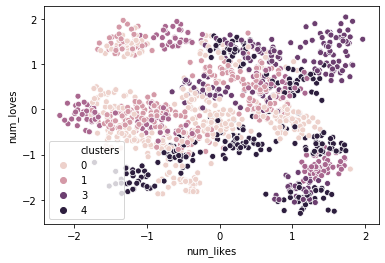

In [59]:
sns.scatterplot(x = 'num_likes',y = 'num_loves',data = df,hue = 'clusters')

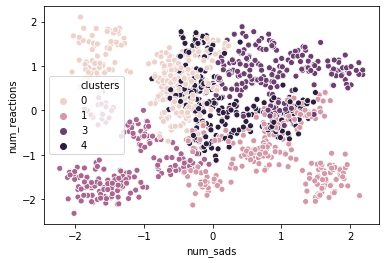

In [61]:
sns.scatterplot(x = 'num_sads',y = 'num_reactions',data = df,hue = 'clusters')

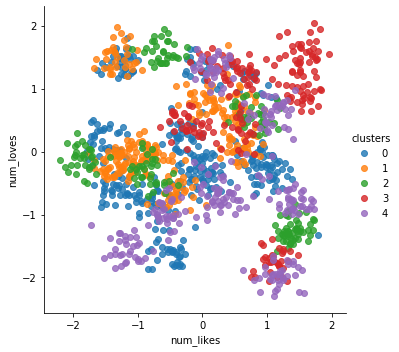

In [76]:
sns.lmplot('num_likes','num_loves',hue ='clusters',data = df,fit_reg = False)

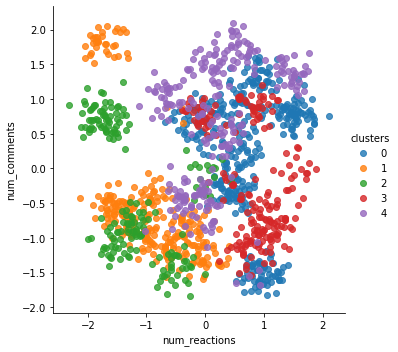

In [77]:
sns.lmplot('num_reactions','num_comments',hue ='clusters',data = df,fit_reg = False)

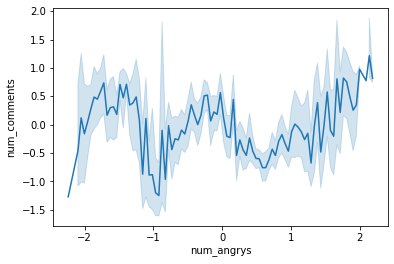

In [88]:
sns.lineplot(data = df,x = 'num_angrys',y = 'num_comments')

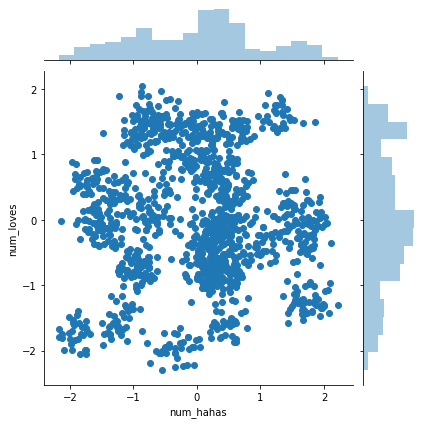

In [93]:
sns.jointplot(data = df,x = 'num_hahas',y = 'num_loves')